In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


%matplotlib inline

# Preparando os dados

In [2]:
# Lendo os dados:

df1 = pd.read_csv('AB_NYC_2019.csv', index_col='id')
df2 = pd.read_csv('listings.csv', index_col='id')

C:\Users\James\AppData\Local\Temp\ipykernel_27464\2922454449.py:4: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('listings.csv', index_col='id')


In [3]:
df1.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df2.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2595,https://www.airbnb.com/rooms/2595,20190806030549,2019-08-07,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.39
3647,https://www.airbnb.com/rooms/3647,20190806030549,2019-08-06,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3831,https://www.airbnb.com/rooms/3831,20190806030549,2019-08-06,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,...,f,f,moderate,f,f,1,1,0,0,4.64
5022,https://www.airbnb.com/rooms/5022,20190806030549,2019-08-06,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
5099,https://www.airbnb.com/rooms/5099,20190806030549,2019-08-06,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,Read My Full Listing For All Information. New ...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.60


In [5]:
# juntando as duas bases em uma única:
colunas_relevantes = ["property_type", "accommodates",  "review_scores_value", 
                      "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", 
                      "review_scores_communication", "review_scores_checkin", "review_scores_rating", 
                      "maximum_nights", "host_is_superhost", "host_response_time", "host_response_rate",  
                      'bathrooms', 'bedrooms', 'beds']
data = pd.merge(df1, df2[colunas_relevantes], on='id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02
accommodates,45524.0,2.823851e+00,1.843100e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.900000e+01


## Ajustando dados faltantes

In [7]:
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
property_type                      3371
accommodates                       3371
review_scores_value               12629
review_scores_cleanliness         12594
review_scores_location            12631
review_scores_accuracy            12611
review_scores_communication       12605
review_scores_checkin             12627
review_scores_rating              12573
maximum_nights                     3371


Vamos dropar a coluna `last_review`, pois não é tão relevante para o modelo.

Como `review_scores` não tem um desvio padrão tão alto, vamos substituir os vazios pela média.

Para o restante, preencheremos com o valor da média.

In [8]:
data.drop(columns=['last_review'], inplace=True)

reviews = ['review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating']
for i in reviews:
  data[i].fillna(data[i].mean(), inplace=True)

data['accommodates'].fillna(data['accommodates'].mean(), inplace=True)
data['maximum_nights'].fillna(data['maximum_nights'].mean(), inplace=True)
data['reviews_per_month'] = data['number_of_reviews'] / 12

a = ['bathrooms', 'beds', 'bedrooms']
for i in a:
  data[i].fillna(data[i].mean(), inplace=True)

Para as colunas categóricas, preencheremos com o valor mais frequente

In [9]:
colunas_categoricas = ['host_response_time', 'host_response_rate', 'property_type', 'host_is_superhost']

for i in colunas_categoricas:
  data[i].fillna(data[i].value_counts().idxmax(), inplace=True)

In [10]:
data.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
property_type                      0
accommodates                       0
review_scores_value                0
review_scores_cleanliness          0
review_scores_location             0
review_scores_accuracy             0
review_scores_communication        0
review_scores_checkin              0
review_scores_rating               0
maximum_nights                     0
host_is_superhost                  0
host_response_time                 0
host_response_rate                 0
b

Vamos analisar a nossa variável de interesse `price`

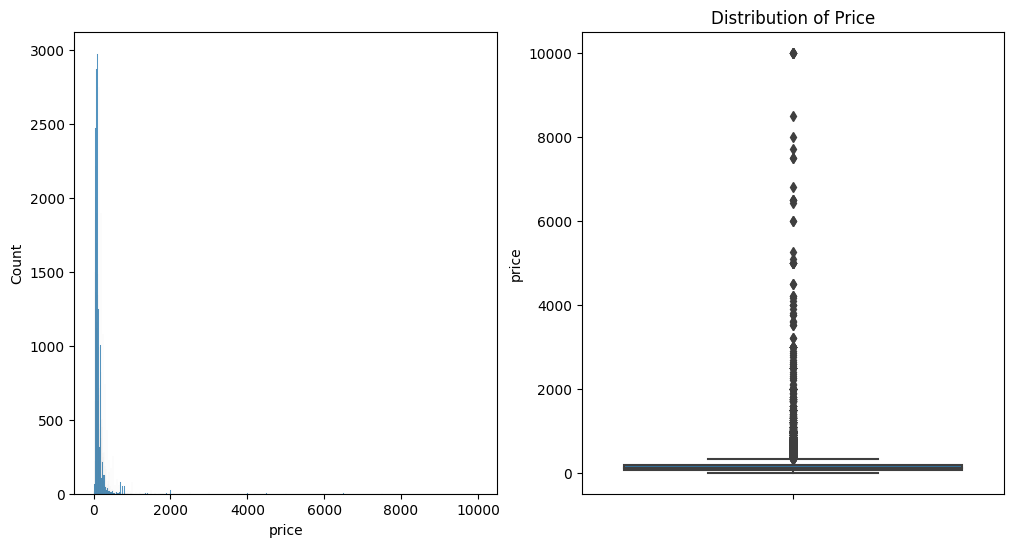

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['price'])

plt.subplot(1,2,2)
sns.boxplot(y=data['price'])
plt.title("Distribution of Price")
plt.show()

Percebe-se que a faixa de preço distoa bastante. Vamos excluir alguns outliers.

In [12]:
mean = data['price'].mean()
std = data['price'].std()

print(f"média: {mean}, desvio padrão: {std}")

média: 152.7206871868289, desvio padrão: 240.15416974718758


In [13]:
# Vamos remover valores acima de 3 desvios padrão

limite_max = mean + 3 * std
data = data[data['price'] <= limite_max]

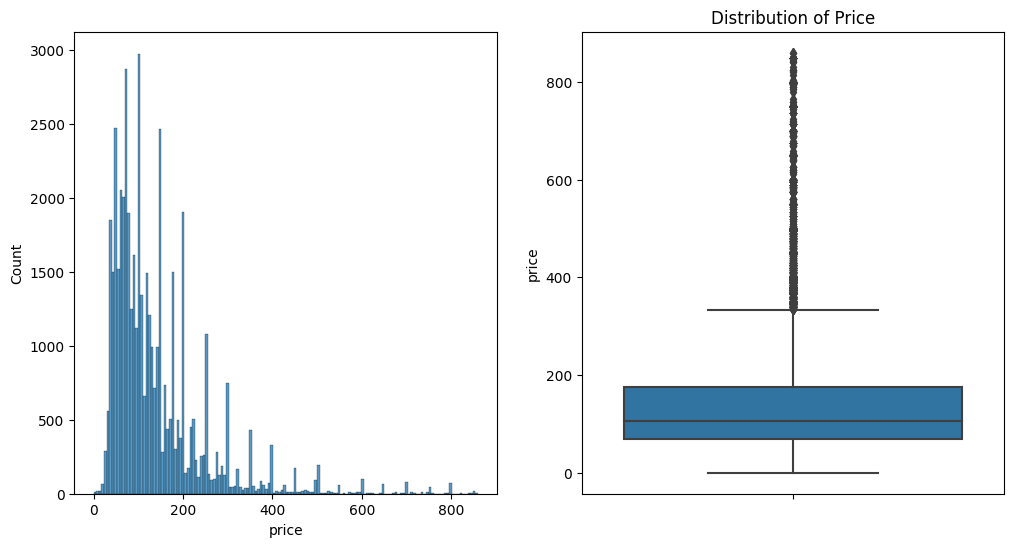

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data['price'])

plt.subplot(1,2,2)
sns.boxplot(y=data['price'])
plt.title("Distribution of Price")
plt.show()

## Investigando correlações

Vamos investigar a correlação entre as variáveis numéricas

C:\Users\James\AppData\Local\Temp\ipykernel_27464\2051905109.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

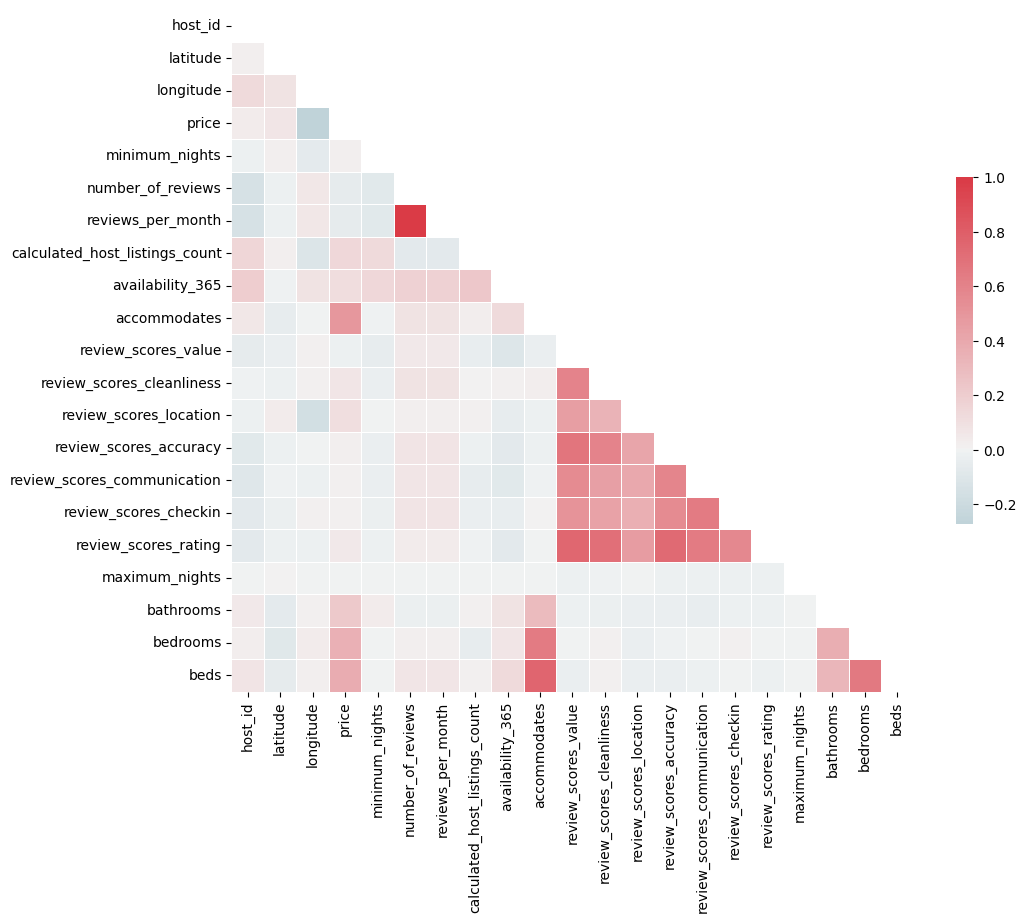

In [15]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Percebe-se que os fatores de maior correlação são os `reviews` entre si. Porém, não estão relacionados com a variável de interesse `price`

Nota-se, porém, que a capacidade de acomodar, a quantidade de quartos, banheiros e camas pare ter forte correlação com o preço.

Além disso, é interessante notar que há uma correlação negativa entre longitude e preço. Ou seja, lugares mais ao sul de Nova Iorque tendem a ser mais caros.

Graficamente, podemos observar:

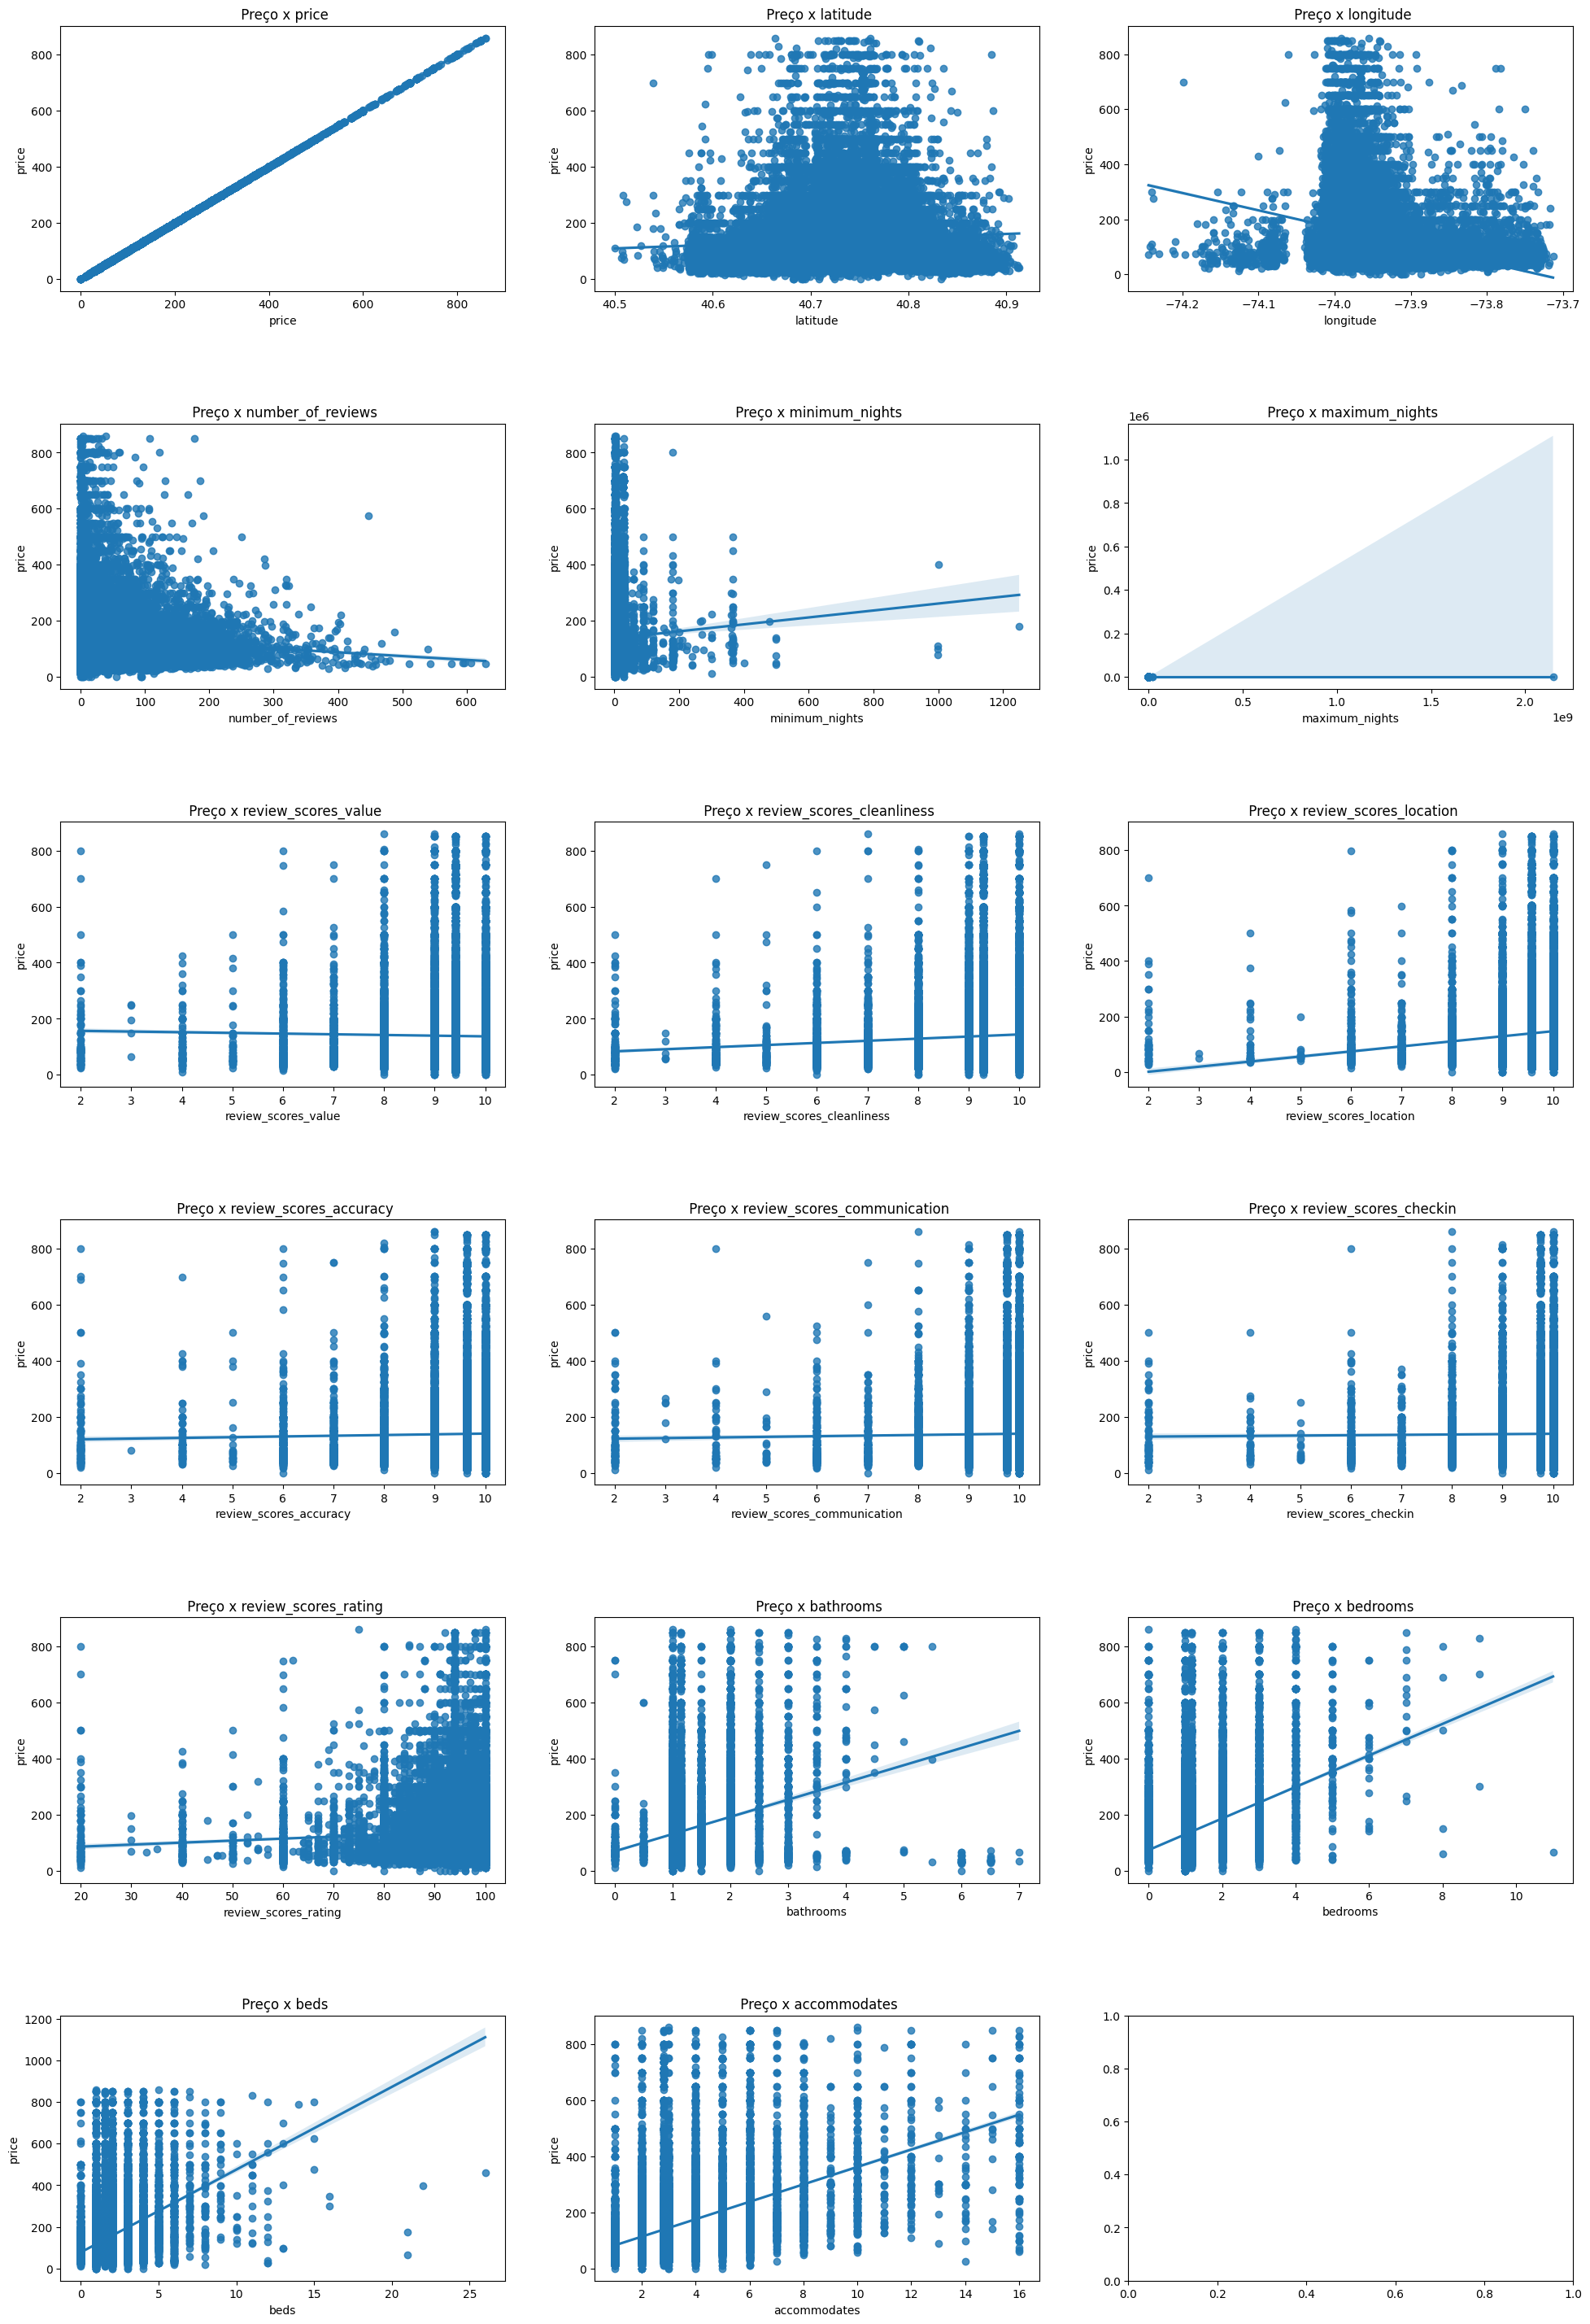

In [16]:
colunas_relevantes = ['price', 'latitude', 'longitude', 'number_of_reviews', 'minimum_nights', 'maximum_nights', 
                     'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 
                     'review_scores_communication', 'review_scores_checkin', 'review_scores_rating',
                     'bathrooms', 'bedrooms', 'beds', 'accommodates', ]

newdf = data.loc[:, colunas_relevantes]
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='price', data=newdf, ax=ax)
  ax.set_title(f" Preço x {name}")

plt.show()

Para as variáveis categóricas, podemos ver como o preço se comporta diante de alguns agrupamentos. Para efeito de análise, vamos agrupar `neighbourhood_group` e `room_type` 

[]

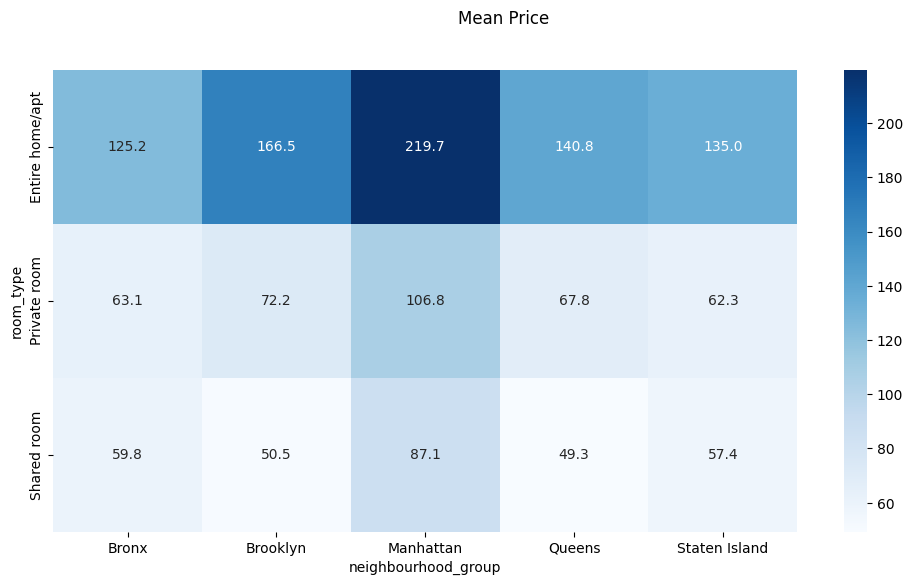

In [17]:
plt.figure(figsize=(12, 6))
df_pivot = data.pivot_table(values='price', index='room_type', columns='neighbourhood_group', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.suptitle('Mean Price')
plt.plot()

Como era de se esperar, no geral, uma residência inteira é mais cara que um quarto privado, que é mais caro que um quarto compartilhado.

Agora que já temos uma noção minimamente melhor sobre nossa base de dados, podemos iniciar o estudo sobre os modelos de Machine Learning.


# Machine Learning

## Preparando o dataframe

Vamos remover algumas colunas que não serão úteis para o modelo. E vamos tratar outras, para que possam ser computadas.

In [18]:
# filtrando apenas as linhas que possuem preço
data = data[data.price > 0]

# removendo colunas que não são relevantes para análise do preço
data.drop(columns=['name', 'host_id', 'host_name', 'reviews_per_month'], inplace=True)

C:\Users\James\AppData\Local\Temp\ipykernel_27464\735591852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['name', 'host_id', 'host_name', 'reviews_per_month'], inplace=True)


Vamos observar se todas colunas já estão devidamente preparadas. Para isso, vamos analisar o tipo dos dados em cada coluna

In [19]:
data.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
property_type                      object
accommodates                      float64
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            float64
review_scores_communication       float64
review_scores_checkin             float64
review_scores_rating              float64
maximum_nights                    float64
host_is_superhost                  object
host_response_time                 object
host_response_rate                 object
bathrooms                         

Há algumas colunas do tipo categórica, como `neighbourhood_group`, `neighbourhood`, `property_type` etc. Para tratá-las, vamos utilizar `LabelEncoder` para transformar o valor de cada categoria em um valor numérico.

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical = data.select_dtypes(include=['object']).columns

for i in categorical:
  data[i] = LabelEncoder().fit_transform(data[i])


data.dtypes

C:\Users\James\AppData\Local\Temp\ipykernel_27464\3112739847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = LabelEncoder().fit_transform(data[i])


neighbourhood_group                 int32
neighbourhood                       int32
latitude                          float64
longitude                         float64
room_type                           int32
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
property_type                       int32
accommodates                      float64
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            float64
review_scores_communication       float64
review_scores_checkin             float64
review_scores_rating              float64
maximum_nights                    float64
host_is_superhost                   int32
host_response_time                  int32
host_response_rate                  int32
bathrooms                         

## Separando base de testes e de treinamento

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Base de Treino: {X_train.shape[0]} linhas")
print(f"Base de Teste:  {X_test.shape[0]} linhas")

Base de Treino: 38796 linhas
Base de Teste:  9700 linhas


# Treinamento dos Modelos

Para cada um dos modelos, analisaremos as seguintes métricas, visando minimizá-las:

- MSE (Mean Squared Error -- Erro Quadrático Médio)
- RMSE (Root Mean Squared Error -- Raiz do Erro Quadrático Médio)
- MAE (Mean Absolute Error) -- Erro Médio Absoluto



In [22]:
# vamos guardar os resultados em algumas variáveis
resultados_predicao = {}
erros_predicao = {}

# K-Neighbors Regressor

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: {}".format(mse))
print("MAE: {}".format(mae))
print("RMSE: {}".format(rmse))
print("---")
print("R2: {}".format(r2))

MSE: 5661.974049484536
MAE: 44.47074226804124
RMSE: 75.24608992821179
---
R2: 0.5377570985086806


In [24]:
resultados_predicao ['KNN-sem-ajuste'] = y_pred
erros_predicao ['KNN-sem-ajuste'] = [mse, r2]

resultados_df = pd.DataFrame(
    {
        'valor-real': np.array(y_test).flatten(), 
        'KNN-sem-ajuste': y_pred.flatten()
    }
)

resultados_df.set_index('valor-real', inplace=True)

erros_df = pd.DataFrame(
        {
            'KNN-sem-ajuste': [mse, r2]
        }     
)

erros_df.reset_index(inplace=True, drop=True)
erros_df.index = ['MSE', 'R2']

resultados_df.head(), erros_df.T.head()

(            KNN-sem-ajuste
 valor-real                
 91                   144.2
 325                  107.6
 225                  225.0
 145                  207.8
 333                  162.0,
                         MSE        R2
 KNN-sem-ajuste  5661.974049  0.537757)

### Ajustes de Hiperparâmetros para KNN

Para o KNN, podemos ajustar o Número de Vizinhos e a função de distância.

Além disso, podemos utilizar validação cruzada para mensurar o desempenho das alterações

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 2],  
              'n_neighbors' : [ 5, 10, 15]
              } 

grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_knn.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [26]:
print(f"Best parameters are {grid_knn.best_params_}") 
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))

Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is 5293.766974102534
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1)


In [27]:
knr_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
knr_best.fit(X_train, y_train)
y_pred_best = knr_best.predict(X_test)

mse_knn_best = mean_squared_error(y_pred_best, y_test)
mae_knn_best = mean_absolute_error(y_pred, y_test)
rmse_knn_best = np.sqrt(mse)
r2_knn_best = r2_score(y_test, y_pred_best)

print("MSE -- ajustado: {}".format(mse_knn_best))
print("MAE -- ajustado: {}".format(mae_knn_best))
print("RMSE -- ajustado: {}".format(rmse_knn_best))
print("R2 -- ajustado: {}".format(r2_knn_best))

MSE -- ajustado: 5023.7476966781205
MAE -- ajustado: 44.47074226804124
RMSE -- ajustado: 75.24608992821179
R2 -- ajustado: 0.5898618235658925


In [28]:
resultados_predicao ['KNN-ajustado'] = y_pred_best
resultados_df['KNN-ajustado'] = y_pred_best.flatten()
erros_predicao ['KNN-ajustado'] = [mse_knn_best, r2_knn_best]

In [29]:
resultados_predicao, erros_predicao, resultados_df

({'KNN-sem-ajuste': array([144.2, 107.6, 225. , ..., 100.6, 166.4,  66. ]),
  'KNN-ajustado': array([180.4       , 127.66666667, 260.73333333, ..., 103.4       ,
         183.2       ,  76.46666667])},
 {'KNN-sem-ajuste': [5661.974049484536, 0.5377570985086806],
  'KNN-ajustado': [5023.7476966781205, 0.5898618235658925]},
             KNN-sem-ajuste  KNN-ajustado
 valor-real                              
 91                   144.2    180.400000
 325                  107.6    127.666667
 225                  225.0    260.733333
 145                  207.8    174.466667
 333                  162.0    172.666667
 ...                    ...           ...
 130                  200.0    136.600000
 90                   124.2    106.066667
 50                   100.6    103.400000
 170                  166.4    183.200000
 53                    66.0     76.466667
 
 [9700 rows x 2 columns])

---
## Support Vector Machine

In [30]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)

preds_svr = clf_svr.predict(X_test)

mse_svr = mean_squared_error(preds_svr, y_test)
mae_svr = mean_absolute_error(preds_svr, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, preds_svr)

print("MSE: {}".format(mse_svr))
print("MAE: {}".format(mae_svr))
print("RMSE: {}".format(rmse_svr))
print("---")
print("R2: {}".format(r2_svr))

MSE: 7363.956513235485
MAE: 47.813794720720175
RMSE: 85.81349843256295
---
R2: 0.39880744853576955


In [31]:
resultados_predicao['SVR-sem-ajuste'] = preds_svr
resultados_df['SVR-sem-ajuste'] = preds_svr.flatten()
erros_predicao['SVR-sem-ajuste'] = [mse_svr, r2_svr]

### Ajustes de hiperparâmetro para SVR

Para SVR, podemos ajustar os parâmetros loss, C e dual e tol.

Utilizaremos a mesma técnica para medir o desempenho com validação cruzada.

In [32]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [True, False],
              'tol': [0.0001, 0.00001]} 

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py", line 489, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\James\AppData\Local\Programs\Python\Python310\lib

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [33]:
print(f"Best parameters are {grid.best_params_}") 
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 1, 'dual': True, 'loss': 'epsilon_insensitive', 'tol': 0.0001}
Best score is 6984.886359007758
Best model is LinearSVR(C=1)
scores [  -7086.2435004    -7084.24031405   -7857.5707291    -7857.74630636
              nan              nan   -7857.92827433   -7857.92809694
   -6984.88635901   -6985.06585646  -11959.26949694  -11985.99207209
              nan              nan  -11898.20749254  -11898.19827101
   -7177.69292666   -7169.37066735  -15724.97913688  -15373.34007976
              nan              nan  -13111.07641738  -13111.06722159
   -7197.7443787    -7171.4919978  -311648.91054215 -307722.3443658
              nan              nan  -13254.03685815  -13254.02730544
   -7442.22390977   -7125.25872202 -699265.74298814 -670899.0064021
              nan              nan  -13268.58393699  -13268.57445046]


In [34]:
svr_best = LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print("MSE -- ajustado: {}".format(mse_svr_best))
print("MAE -- ajustado: {}".format(mae_svr_best))
print("RMSE -- ajustado: {}".format(rmse_svr_best))
print("R2 -- ajustado: {}".format(r2_svr_best))

MSE -- ajustado: 7379.101225944836
MAE -- ajustado: 47.81941299968019
RMSE -- ajustado: 85.90169512847133
R2 -- ajustado: 0.39757103595530907


In [35]:
resultados_predicao['SVR-ajustado'] = preds_svr_best
resultados_df['SVR-ajustado'] = preds_svr_best.flatten()
erros_predicao['SVR-ajustado'] = [mse_svr_best, r2_svr_best]

---

### Redes Neurais

In [64]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [65]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=([X_train.shape[1]])),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [66]:
model = build_model()

history = model.fit(
  X_train, y_train,
  epochs=200, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9913.0771,  mae:61.6746,  mse:9913.0771,  val_loss:6088.0669,  val_mae:47.1802,  val_mse:6088.0669,  
....................................................................................................
Epoch: 100, loss:3986.7024,  mae:38.5612,  mse:3986.7024,  val_loss:6608.2344,  val_mae:40.3155,  val_mse:6608.2344,  
....................................................................................................

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


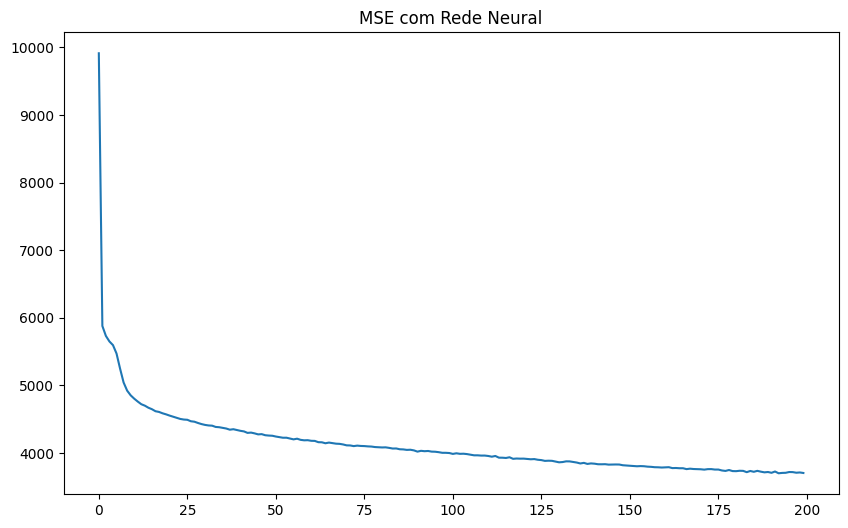

In [68]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.plot(hist.mse)
plt.title("MSE com Rede Neural")
plt.show()

In [69]:
preds_nn = model.predict(X_test)

mse_nn = mean_squared_error(y_test, preds_nn)
mae_nn = mean_absolute_error(y_test, preds_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, preds_nn)

print("MSE: {}".format(mse_nn))
print("MAE: {}".format(mae_nn))
print("RMSE: {}".format(rmse_nn))
print("R2: {}".format(r2_nn))

304/304 [==============================] - 1s 2ms/step
MSE: 4899.691104482731
MAE: 40.658999489349185
RMSE: 69.99779356867423
R2: 0.5999897892938073


In [70]:
resultados_predicao['Rede-neural'] = preds_svr_best
resultados_df['Rede-neural'] = preds_svr_best.flatten()
erros_predicao['Rede-neural'] = [mse_svr_best, r2_svr_best]